In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
train_data = pd.read_csv('/workspaces/codespaces-jupyter/data/train.csv')
test_data = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv')

In [3]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [4]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


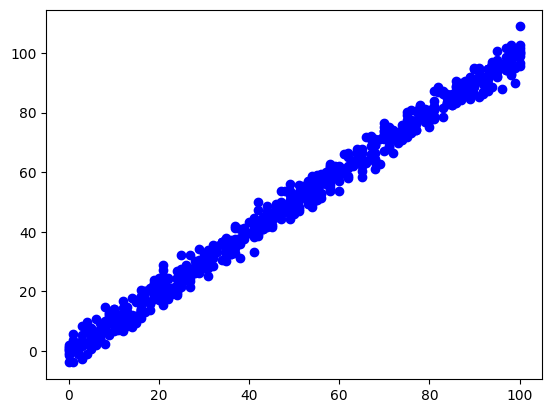

In [5]:
plt.scatter(x=train_data['x'], y=train_data['y'], color='blue', label='Training Data')

In [6]:
X_train = train_data['x'].values
y_train = train_data['y'].values

X_test = test_data['x'].values
y_test = test_data['y'].values

In [7]:
def standardise_data(X_train, X_test):
    ''''''
    mean = np.mean(X_train,axis=0)
    std = np.std(X_train,axis=0)

    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    return X_train, X_test

X_train, X_test = standardise_data(X_train, X_test)

In [8]:
'''ML models expect 2D arrays or 2D input data,but
the current data is 1D. Hence we need to reshape it'''
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [9]:
class LinearRegression:
    '''linear regression model with gradient descent 
    we are not using the sklearn library. We are going to implement the linear regression from scratch'''
    def __init__(self,learning_rate, convergence_tol = 1e-6):
        self.learning_rate = learning_rate
        self.convergence_tol = convergence_tol
        self.W = None
        self.b = None

    def initialize_parameters(self, n_features):
        '''initialize the weights and bias'''
        self.W = np.random.randn(n_features, )*0.01
        self.b = 0.0

    def forward(self, X):
        '''forward pass to compute the predictions'''
        return np.dot(X, self.W) + self.b
    
    def compute_cost(self, predictions):
        '''compute the loss using mean squared error'''
        m = len(predictions)
        cost = np.sum(np.square(predictions - self.y))/(2*m)
        return cost;

    def backward(self, predictions):
        '''compute gradients for model parameters
           parameters:
            predictions(numpy.ndarray): Predictions of shape(m,)
            
           updates:
            numpy.ndarray: Gradient of W
            float: Gradient of b.'''
        
        m = len(predictions)
        self.dW = np.dot(predictions - self.y, self.X)/m
        self.db = np.sum(predictions - self.y)/m

    def fit(self, X, y, iterations, plot_cost=True):
        '''fit the linear regression model to the training data
           parameters:
            X (numpy.ndarray): training input data of shape(m,n_features)
            y (numpy.ndarray): training labels of shape(m,)
            iterations (int): the number of iterations for gradient.
            plot_cost(bool,optional): whether to plot the cost during training.Defaults to True.
            Raises:
                AssertionError: if input data and labels are not numpy or have mismatched shapes.
                
            plots:
                matplotlib line chart showing cost vs iteration (if plot_cost is True)'''
        
        assert isinstance(X, np.ndarray), "X should be a numpy array"
        assert isinstance(y, np.ndarray), "y should be a numpy array"

        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"

        assert iterations > 0, "Iterations must be a positive integer"

        self.X = X
        self.y = y
        self.initialize_parameters(X.shape[1])
        costs = []

        for i in range(iterations):
            predictions = self.forward(X)
            cost = self.compute_cost(predictions)
            

            self.backward(predictions)

            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tol:
                print(f"Convergence reached at iteration {i}")
                break

        if plot_cost:
            plt.plot(costs, label='Cost')
            plt.xlabel('Iterations')
            plt.ylabel('Cost')
            plt.title('Cost vs Iterations')
            plt.legend()
            plt.show()
                

    def predict(self, X):
        '''
            predict target values for new input data
            
            parameters:
                X (numpy.ndarray): input data of shape (m, n_features)
                
            Returns:
                numpy.ndarray; predicted target values of shape(m,)'''
        
        return self.forward(X)
    
    def save_model(self, filename=None):
        '''
            save the trained model to a file using pickle

            parameters:
                filename(str): the name of the file to save the model

        '''
        model_data = {
            'learning_rate' : self.learning_rate,
            'convergence_tol': self.convergence_tol,
            'W' : self.W,
            'b' : self.b    
        }
        with open(filename, 'wb') as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        '''
           load a trained model from a file using pickle
           parameters:
              filename (str); the name of the file to load the model from 

            returns :
              LinearRegression : an instance of the LinearRegression class with loaded parameters 
        '''
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)
        loaded_model = cls(model_data['learning_rate'], model_data['convergence_tol'])
        loaded_model.W = model_data['W']
        loaded_model.b = model_data['b']
        return loaded_model

Cost at iteration 0: 1670.210579599553
Cost at iteration 100: 227.18108728927223
Cost at iteration 200: 33.844465099091124
Cost at iteration 300: 7.941287319913943
Cost at iteration 400: 4.470787983271819
Cost at iteration 500: 4.005811610553723
Cost at iteration 600: 3.943514227320317
Cost at iteration 700: 3.935167644170206
Cost at iteration 800: 3.9340493716735794
Convergence reached at iteration 863


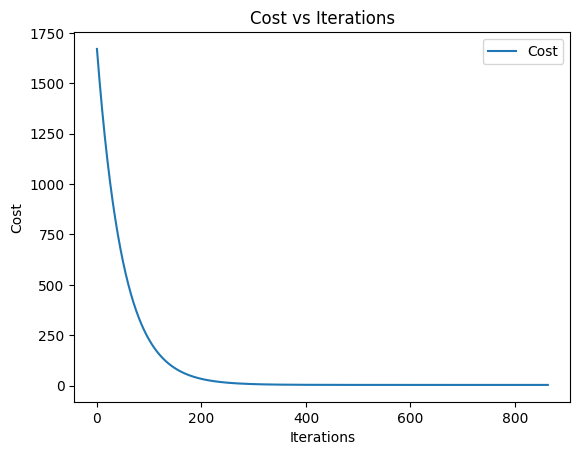

In [13]:
lr = LinearRegression(0.01)
lr.fit(X_train, y_train,1000)

In [17]:
lr.save_model('model.pkl')
model = LinearRegression.load_model('model.pkl')

In [18]:
class RegressionMetrics:
    @staticmethod
    def mean_squared_error(y_true, y_pred):
        '''
            calculate the mean squared error(MSE),
            Args :
               y_true(numpy.ndarray): the true target values.
               y_pred(numpy.ndarray): the predicted target values.

            Returns :
               float: the mean squared error.
        '''
        assert len(y_true) == len(y_pred), "y_true and y_pred must have the same length"
        mse = np.mean((y_true - y_pred) ** 2)
        return mse
    
    def root_mean_squared_error(y_true, y_pred):
        '''
            calculate the root mean squared error(RMSE),
            Args :
               y_true(numpy.ndarray): the true target values.
               y_pred(numpy.ndarray): the predicted target values.

            Returns :
               float: the root mean squared error.
        '''
        assert len(y_true) == len(y_pred), "y_true and y_pred must have the same length"
        mse = RegressionMetrics.mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        return rmse
    
    def r_squared(y_true, y_pred):
        '''
            calculate the R-squared score,
            Args :
               y_true(numpy.ndarray): the true target values.
               y_pred(numpy.ndarray): the predicted target values.

            Returns :
               float: the R-squared score.
        '''
        assert len(y_true) == len(y_pred), "y_true and y_pred must have the same length"
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r_squared = 1 - (ss_residual / ss_total)
        return r_squared


In [19]:
y_pred = model.predict(X_test)
mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
r2_value = RegressionMetrics.r_squared(y_test, y_pred)

print(f"mean squared error: {mse_value}")
print(f"root mean squared error: {rmse_value}")
print(f"R-squared: {r2_value}")

mean squared error: 9.442670546338519
root mean squared error: 3.072892862814862
R-squared: 0.9887898714032023
